# Notebook for an example Coronal Model Evaluation full cycle

In [1]:
from CHmetric import CHmetric, ezseg
from WLmetric import WLmetric
from NLmetric import NLmetric

from CHMAP import chmap

import datetime
import matplotlib.pyplot as plt
import numpy as np
import sunpy.map

## Coronal Hole Metric

### Step 1 : Create Carrington Map using EUV data from +/- 14 days surrounding an input date

In [2]:
euvmappath = CHmetric.create_euv_map(datetime.datetime(2018,11,6))

Searching for input EUV maps

Files Downloaded:   0%|          | 0/28 [00:00<?, ?file/s]

Reprojecting 28 Maps: 


/home/sbadman/1_RESEARCH/GIT_REPOS/CoronalModelEval/CHmetric/CHmetric.py:92: RuntimeWarning: Mean of empty slice
  np.nanmean([


In [3]:
euvmap = sunpy.map.Map(euvmappath)

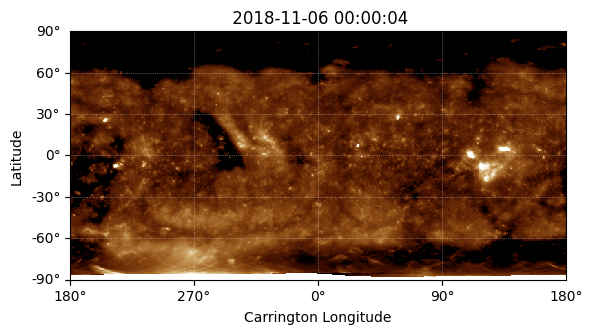

In [4]:
euvmap.plot(cmap="sdoaia193",
            vmin=np.nanpercentile(euvmap.data.flatten(),20),
            vmax=np.nanpercentile(euvmap.data.flatten(),99.9)
           )

### Step 2 : Extract Coronal Hole Contours with EZSEG

In [57]:
# Takes about a min to run in python
ch_obs_path = CHmetric.extract_obs_ch(euvmappath,
                                      replace=True,
                                      ezseg_params={
                                          "thresh1":np.nanmax(euvmap.data.flatten())*0.07, ## Seed threshold
                                          "thresh2":np.nanmax(euvmap.data.flatten())*0.101, ## Growing Threshhold
                                          "nc":5, ## at least 7 consecutive pixels to declare coronal hole area is connected
                                          "iters":100
                                      }
                                     )

ch_obs_map = sunpy.map.Map(ch_obs_path)

/home/sbadman/anaconda3/lib/python3.9/site-packages/astropy/visualization/wcsaxes/core.py:254: UserWarning: No contour levels were found within the data range.
  cset = super().contour(*args, **kwargs)


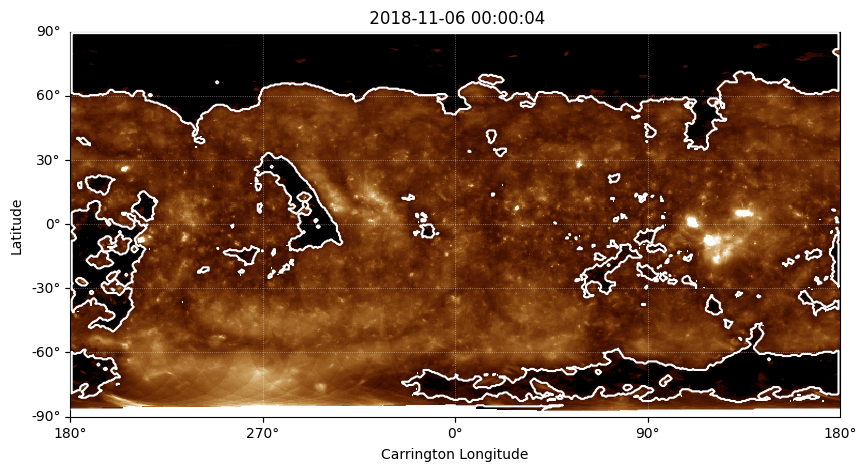

In [58]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(projection=euvmap.wcs)
euvmap.plot(cmap="sdoaia193",
            vmin=np.nanpercentile(euvmap.data.flatten(),20),
            vmax=np.nanpercentile(euvmap.data.flatten(),99.9),
            axes=ax
           )
ch_obs_map.draw_contours(levels=[1],colors=["white"],axes=ax)

### Step 3 : Load in Model Coronal Hole Map and Run Binary Classifier to Score